# Summer School on Data Science Tools and Techniques in Modelling Complex Networks

### [Bogumił Kamiński](http://bogumilkaminski.pl/about/)

## Working with graph data using Julia Language
### Day 2, Tuesday, August 20th, 2019, 13:00 to 16:00

## Erdős–Rényi model

In [1]:
using Pkg
Pkg.activate(".")
using LightGraphs
using Distributions
using Statistics
using DataFrames
using GraphPlot
using PyPlot

In the $G(n, p)$ model, a graph is constructed by connecting $n$ nodes randomly.

Each edge is included in the graph with probability $p$ independent from every other edge.

In [2]:
function ER_dense(n, p)
    g = SimpleGraph(n)
    for i in 1:n, j in i+1:n
        if rand() < p
            add_edge!(g, i, j)
        end
    end
    g
end

ER_dense (generic function with 1 method)

In [3]:
g1 = ER_dense(10, 0.5)

{10, 29} undirected simple Int64 graph

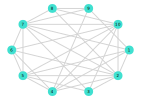

In [4]:
gplot(g1, nodelabel=1:10, layout=circular_layout)

In [5]:
collect(edges(g1))

29-element Array{LightGraphs.SimpleGraphs.SimpleEdge{Int64},1}:
 Edge 1 => 2 
 Edge 1 => 4 
 Edge 1 => 5 
 Edge 1 => 7 
 Edge 1 => 9 
 Edge 2 => 3 
 Edge 2 => 4 
 Edge 2 => 5 
 ⋮           
 Edge 6 => 7 
 Edge 6 => 10
 Edge 7 => 8 
 Edge 7 => 9 
 Edge 7 => 10
 Edge 8 => 9 
 Edge 8 => 10

In [6]:
function ER_sparse(n, p)
    g = SimpleGraph(n)
    m = rand(Binomial(div(n*(n-1), 2), p))
    while ne(g) < m
        i, j = rand(1:n), rand(1:n)
        if i != j
            add_edge!(g, i, j)
        end
    end
    g
end

ER_sparse (generic function with 1 method)

In [7]:
g2 = ER_sparse(10, 0.5)

{10, 18} undirected simple Int64 graph

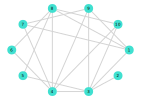

In [8]:
gplot(g2, nodelabel=1:10, layout=circular_layout)

In [9]:
collect(edges(g2))

18-element Array{LightGraphs.SimpleGraphs.SimpleEdge{Int64},1}:
 Edge 1 => 3 
 Edge 1 => 7 
 Edge 1 => 8 
 Edge 1 => 9 
 Edge 2 => 3 
 Edge 3 => 4 
 Edge 3 => 5 
 Edge 3 => 9 
 ⋮           
 Edge 4 => 8 
 Edge 4 => 9 
 Edge 4 => 10
 Edge 5 => 8 
 Edge 6 => 8 
 Edge 7 => 9 
 Edge 8 => 10

In [10]:
for p in (0.001, 0.01, 0.1)
    println("p = $p")
    @time ER_dense(10000, p)
    @time ER_sparse(10000, p)
end

p = 0.001
  0.258844 seconds (36.60 k allocations: 3.018 MiB, 5.64% gc time)
  0.020694 seconds (37.38 k allocations: 3.164 MiB)
p = 0.01
  0.348428 seconds (70.03 k allocations: 21.654 MiB, 2.72% gc time)
  0.330156 seconds (70.11 k allocations: 21.809 MiB, 1.53% gc time)
p = 0.1
  1.595192 seconds (102.17 k allocations: 194.148 MiB, 12.56% gc time)
  7.556371 seconds (103.16 k allocations: 209.646 MiB, 4.39% gc time)


## Mean degree analysis

In [11]:
er_mean_degree = DataFrame(n=Int[], d=Float64[], sample_d=Float64[])

,n,d,sample_d
,Int64,Float64,Float64


In [12]:
d = 2
for n in [10, 100, 1000, 10000]
    for reps in 1:1000
        g = erdos_renyi(n, 2/n)
        degs = degree(g)
        push!(er_mean_degree, (n, d, mean(degs)))
    end
end
er_mean_degree

,n,d,sample_d
,Int64,Float64,Float64
1,10,2.0,0.8
2,10,2.0,2.2
3,10,2.0,1.8
4,10,2.0,2.2
5,10,2.0,1.6
6,10,2.0,1.8
7,10,2.0,1.4
8,10,2.0,2.0
9,10,2.0,2.6


In [13]:
res = by(er_mean_degree, [:n, :d], mean_degree=:sample_d=>mean, std_degree=:sample_d=>std)

,n,d,mean_degree,std_degree
,Int64,Float64,Float64,Float64
1,10,2.0,1.816,0.535267
2,100,2.0,1.983,0.197051
3,1000,2.0,1.99866,0.0621381
4,10000,2.0,1.99944,0.0203769


In [14]:
res.th_degree = @. 2 * binomial(res.n, 2) * res.d / res.n^2
res

,n,d,mean_degree,std_degree,th_degree
,Int64,Float64,Float64,Float64,Float64
1,10,2.0,1.816,0.535267,1.8
2,100,2.0,1.983,0.197051,1.98
3,1000,2.0,1.99866,0.0621381,1.998
4,10000,2.0,1.99944,0.0203769,1.9998


## Giant component

In [15]:
function largest_component(n, d)
    g = erdos_renyi(n, d/n)
    ccs = connected_components(g)
    sizes = length.(ccs)
    maximum(sizes) / n
end

largest_component (generic function with 1 method)

In [16]:
lc_df_10k = DataFrame(d=Float64[], largest=Float64[])

,d,largest
,Float64,Float64


In [17]:
for d in 0.8:0.01:2.0
    for reps in 1:32
        push!(lc_df_10k, (d, largest_component(10000, d)))
    end
end
lc_df_10k

,d,largest
,Float64,Float64
1,0.8,0.01
2,0.8,0.0056
3,0.8,0.0045
4,0.8,0.0049
5,0.8,0.0064
6,0.8,0.0102
7,0.8,0.007
8,0.8,0.0057
9,0.8,0.0065


In [18]:
res = by(lc_df_10k, :d, mean_largest=:largest=>mean, std_largest=:largest=>std)

,d,mean_largest,std_largest
,Float64,Float64,Float64
1,0.8,0.00734375,0.00251177
2,0.81,0.00744375,0.0026253
3,0.82,0.00733438,0.00272025
4,0.83,0.00847188,0.00320415
5,0.84,0.00895312,0.00358095
6,0.85,0.00916563,0.00359728
7,0.86,0.0107594,0.00519739
8,0.87,0.0120281,0.00589895
9,0.88,0.0121219,0.00582955


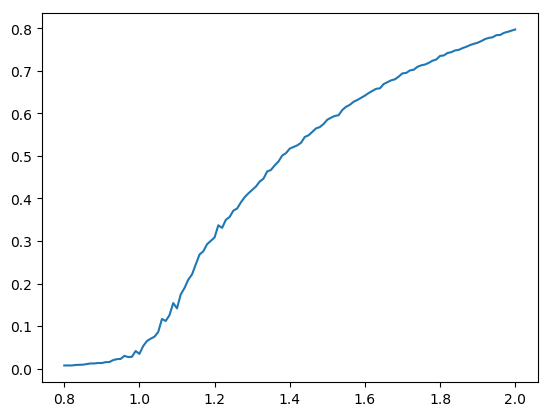

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000020340B8>

In [19]:
plot(res.d, res.mean_largest)

In [20]:
df_largest_n = DataFrame(n=Int[], d=Float64[], largest=Float64[])

,n,d,largest
,Int64,Float64,Float64


In [21]:
for d in [0.9, 1.0, 1.1, 1.2]
    for n in [2^i for i in 8:16]
        for reps in 1:64
            push!(df_largest_n, (n, d, largest_component(n, d)))
        end
    end
end
df_largest_n

,n,d,largest
,Int64,Float64,Float64
1,256,0.9,0.0820313
2,256,0.9,0.078125
3,256,0.9,0.0429688
4,256,0.9,0.0585938
5,256,0.9,0.195313
6,256,0.9,0.0898438
7,256,0.9,0.0429688
8,256,0.9,0.0507813
9,256,0.9,0.0390625


In [22]:
res = groupby(by(df_largest_n, [:n, :d], m=:largest=>mean), :d)

,n,d,m
,Int64,Float64,Float64
1,256,0.9,0.101868
2,512,0.9,0.0709839
3,1024,0.9,0.0568542
4,2048,0.9,0.0368042
5,4096,0.9,0.0254745
6,8192,0.9,0.016777
7,16384,0.9,0.0106821
8,32768,0.9,0.00674915
9,65536,0.9,0.00389218


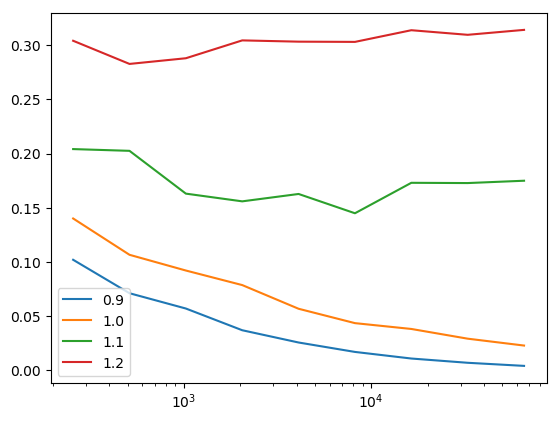

In [23]:
for sdf in res
    plot(sdf.n, sdf.m)
end
legend([sdf.d[1] for sdf in res])
plt.xscale("log")